In [86]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from matplotlib import style
import pickle
from sklearn import model_selection, datasets
from random import randint

In [2]:
data18 = pd.read_csv('2018-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])
data19 = pd.read_csv('2019-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])
data20 = pd.read_csv('2020-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])

In [3]:
data18.head()

,2018,2017,Institution Name,Country,Classification,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Academic Reputation,...,Unnamed: 12_level_0,Faculty Student,Unnamed: 14_level_0,Citations per Faculty,Unnamed: 16_level_0,International Faculty,Unnamed: 18_level_0,International Students,Unnamed: 20_level_0,Overall Score
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,SIZE,FOCUS,RESEARCH INTENSITY,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,Unnamed: 21_level_1
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6


In [4]:
def resolve_columns(df: pd.core.frame.DataFrame) -> list:
    cols = []
    rankNumber = 1
    for column in df:
        if column[0].startswith('Unnamed'):
            if column[1].startswith('RANK'):
                cols.append(column[1] + '_' + str(rankNumber))
                rankNumber +=1
            else:
                cols.append(column[1])
        elif column[1].startswith('Unnamed'):
            if column[0].startswith('RANK'):
                cols.append(column[0] + '_' + str(rankNumber))
                rankNumber +=1
            else:
                cols.append(column[0])
        else:
            cols.append(column[0] + ' ' + column[1].capitalize())
    return cols

In [5]:
data18.columns = resolve_columns(data18)
data19.columns = resolve_columns(data19)
data20.columns = resolve_columns(data20)
data18

,2018,2017,Institution Name,Country,Classification Size,FOCUS,RESEARCH INTENSITY,AGE,STATUS,Academic Reputation Score,...,RANK_2,Faculty Student Score,RANK_3,Citations per Faculty Score,RANK_4,International Faculty Score,RANK_5,International Students Score,RANK_6,Overall Score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,NaN,NaN,WHU OTTO BEISHEIM SCHOOL OF MANAGEMENT - KOBLENZ,Germany,S,SP,VH,3.0,NaN,-,...,-,-,-,-,-,-,-,-,-,-
980,Source: QS Intelligence Unit (www.topuniversit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,You may not reconfigure the data or content in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,Under no circumstances should data be re-order...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#columns used for the determination of the rankings will be saved in a variable called det_columns
det_columns = ['Academic Reputation Score', 'Employer Reputation Score', 'Faculty Student Score',
               'Citations per Faculty Score', 'International Faculty Score', 'International Students Score']

In [7]:
data18.replace('-', 0,inplace=True)

<AxesSubplot:>

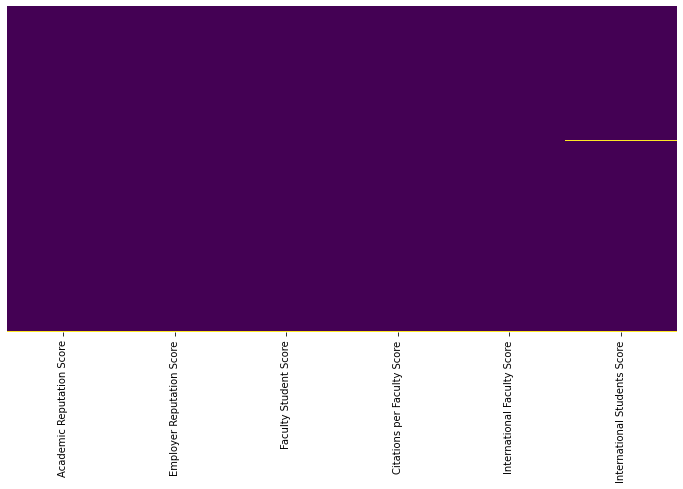

In [8]:
# checking null values in 2018 dataset
# yellow color means null value
plt.figure(figsize=(12,6))
sns.heatmap(data18[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [28]:
data18.replace('-', 0,inplace=True)

In [29]:
data18.isnull()

,2018,2017,Institution Name,Country,Classification Size,FOCUS,RESEARCH INTENSITY,AGE,STATUS,Academic Reputation Score,...,RANK_2,Faculty Student Score,RANK_3,Citations per Faculty Score,RANK_4,International Faculty Score,RANK_5,International Students Score,RANK_6,Overall Score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,True,True,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
980,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
981,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
982,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
data19.replace('-', 0,inplace=True)


<AxesSubplot:>

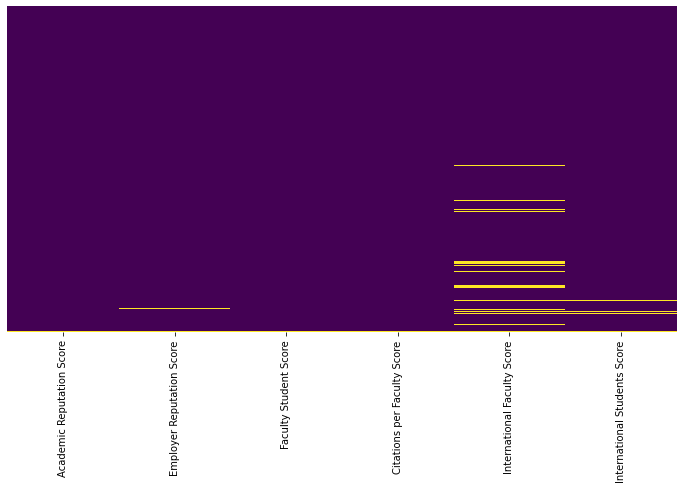

In [10]:
# checking null values in 2019 dataset
plt.figure(figsize=(12,6))
sns.heatmap(data19[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [11]:
data20.replace('-', 0,inplace=True)

<AxesSubplot:>

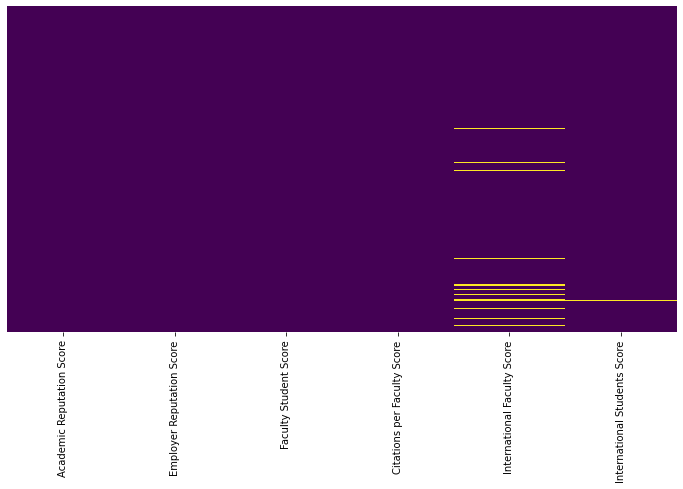

In [12]:
# Checking for null values in 2020 data
plt.figure(figsize=(12,6))
sns.heatmap(data20[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

# model training


In [35]:
data18 = data18.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
data19 = data19.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
data20 = data20.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()

In [36]:
data18.dropna(inplace=True)
data19.dropna(inplace=True)
data20.dropna(inplace=True)


In [37]:
features18 = data18[det_columns]
features19 = data19[det_columns]
features20 = data20[det_columns]

In [87]:
feature_data = pd.concat([features18, features19, features20])
target_data = pd.concat([
    data18['Overall Score'], data19['Overall Score'], data20['Overall Score']
])

X = np.array(feature_data.values)
y = np.array(target_data.values)


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2)

In [106]:
best_accuracy = 0
least_acc = 0
for w in range(1000):
    rs = randint(1, 500)
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X, y, test_size=0.1, random_state=rs)

    model = LinearRegression()

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acc = model.score(x_test, y_test)  # acc stands for accuracy
    print("Accuracy: " + str(acc))
    if acc > best_accuracy:
        best_accuracy = acc
        with open("university_score", 'wb') as f:
            pickle.dump(model, f)
            

pickle_in = open("university_score", "rb")
model = pickle.load(pickle_in)

Accuracy: 0.9469767113620036
Accuracy: 0.9292557619904898
Accuracy: 0.9599253492978044
Accuracy: 0.947117620778397
Accuracy: 0.962493097797324
Accuracy: 0.9453350588959876
Accuracy: 0.9528819214645475
Accuracy: 0.9501620061098377
Accuracy: 0.9410450455649094
Accuracy: 0.940830638239342
Accuracy: 0.9391338144235575
Accuracy: 0.955590135555086
Accuracy: 0.9464219786779714
Accuracy: 0.9457218881390304
Accuracy: 0.9379998132651538
Accuracy: 0.9510063886589003
Accuracy: 0.9482011956428633
Accuracy: 0.9298350754195457
Accuracy: 0.9565433931827207
Accuracy: 0.9482777577578342
Accuracy: 0.9504542855095828
Accuracy: 0.9424573691460566
Accuracy: 0.9453082642882965
Accuracy: 0.9561537266019753
Accuracy: 0.9467870342279625
Accuracy: 0.9471961001626968
Accuracy: 0.9502027537755154
Accuracy: 0.9372683217306101
Accuracy: 0.9441461029564295
Accuracy: 0.9588450212501148
Accuracy: 0.9478291515862091
Accuracy: 0.9481760995291065
Accuracy: 0.9471441537631208
Accuracy: 0.942316859844439
Accuracy: 0.9406397

Accuracy: 0.9561537266019753
Accuracy: 0.9462712007928749
Accuracy: 0.9520997815207478
Accuracy: 0.9520062072885858
Accuracy: 0.9237070476311042
Accuracy: 0.9516056877589426
Accuracy: 0.9412517353813011
Accuracy: 0.9484083306321286
Accuracy: 0.9401258791584467
Accuracy: 0.9603806537084338
Accuracy: 0.9458121797695294
Accuracy: 0.9240635695913274
Accuracy: 0.9463842581955217
Accuracy: 0.960632794560448
Accuracy: 0.9571402329897658
Accuracy: 0.9487167430733064
Accuracy: 0.936568489058311
Accuracy: 0.9469247716475663
Accuracy: 0.9468509588464479
Accuracy: 0.9579908807273199
Accuracy: 0.9595825522047593
Accuracy: 0.9446682054737697
Accuracy: 0.9487966689858756
Accuracy: 0.942316859844439
Accuracy: 0.9600646728550539
Accuracy: 0.9519565779843455
Accuracy: 0.9393645642195764
Accuracy: 0.9495626407013034
Accuracy: 0.9376041524965626
Accuracy: 0.9546002383883762
Accuracy: 0.9536831658977949
Accuracy: 0.9462182211703588
Accuracy: 0.9432103169798428
Accuracy: 0.9527427775866782
Accuracy: 0.95841

Accuracy: 0.960632794560448
Accuracy: 0.9420596814266219
Accuracy: 0.951285677518158
Accuracy: 0.9545542585068396
Accuracy: 0.9482580967329144
Accuracy: 0.9445450555983794
Accuracy: 0.9478291515862091
Accuracy: 0.9482777577578342
Accuracy: 0.9462712007928749
Accuracy: 0.9509514938595419
Accuracy: 0.93316748272245
Accuracy: 0.9348165578049729
Accuracy: 0.9459673054208569
Accuracy: 0.9252634190732962
Accuracy: 0.9382115008958808
Accuracy: 0.9487966689858756
Accuracy: 0.9391908937172385
Accuracy: 0.9572397631589208
Accuracy: 0.9333071229890959
Accuracy: 0.9600646728550539
Accuracy: 0.9599652429296112
Accuracy: 0.9390576360416343
Accuracy: 0.9460370220084885
Accuracy: 0.9592441412449627
Accuracy: 0.9606934754989007
Accuracy: 0.953503143145629
Accuracy: 0.9424838969929342
Accuracy: 0.9395513626267843
Accuracy: 0.9482984367642151
Accuracy: 0.9287244607380225
Accuracy: 0.9503097283473062
Accuracy: 0.9583262618705235
Accuracy: 0.947117620778397
Accuracy: 0.9376041524965626
Accuracy: 0.94465702

Accuracy: 0.9467602461944788
Accuracy: 0.9500930133731241
Accuracy: 0.9469280257489417
Accuracy: 0.9572397631589208
Accuracy: 0.9543362777363668
Accuracy: 0.9365517200927306
Accuracy: 0.9331812506330042
Accuracy: 0.9583856979653569
Accuracy: 0.9264722762032653
Accuracy: 0.9438921273419041
Accuracy: 0.9478291515862091
Accuracy: 0.951774877256929
Accuracy: 0.9260372975395725
Accuracy: 0.9379998132651538
Accuracy: 0.9589913530828739
Accuracy: 0.9487966689858756
Accuracy: 0.9391338144235575
Accuracy: 0.9526230133270722
Accuracy: 0.9406397182164109
Accuracy: 0.962493097797324
Accuracy: 0.9424838969929342
Accuracy: 0.9479090340153029
Accuracy: 0.9402382353656784
Accuracy: 0.9391338144235575
Accuracy: 0.9492517650053569
Accuracy: 0.9510173663423133
Accuracy: 0.9442780366220288
Accuracy: 0.9587475330115445
Accuracy: 0.9476275510647336
Accuracy: 0.9442024144566283
Accuracy: 0.9565433931827207
Accuracy: 0.9418898934869256
Accuracy: 0.9442780366220288
Accuracy: 0.942316859844439
Accuracy: 0.94864

Accuracy: 0.9391884801687276
Accuracy: 0.9390703862357455
Accuracy: 0.9524082563563883
Accuracy: 0.9398439131414296
Accuracy: 0.9484083306321286
Accuracy: 0.941190324865919
Accuracy: 0.944657025588049
Accuracy: 0.9390703862357455
Accuracy: 0.947361390199337
Accuracy: 0.9479650859025188
Accuracy: 0.9430327643343689
Accuracy: 0.9357786747442659
Accuracy: 0.9505746930088868
Accuracy: 0.9413171522457938
Accuracy: 0.9406275478817824
Accuracy: 0.940119596449768
Accuracy: 0.9498479539316189
Accuracy: 0.9443219230355354
Accuracy: 0.9252634190732962
Accuracy: 0.9264722762032653
Accuracy: 0.9489272534221326
Accuracy: 0.9458121797695294
Accuracy: 0.938028103418641
Accuracy: 0.952866425318925
Accuracy: 0.9536831658977949
Accuracy: 0.948645499934036
Accuracy: 0.9484953684652794
Accuracy: 0.9505746930088868
Accuracy: 0.9438394158109125
Accuracy: 0.9291739679359291
Accuracy: 0.9484083306321286
Accuracy: 0.9399390784637947
Accuracy: 0.9487882182931728
Accuracy: 0.942721830758667
Accuracy: 0.9470479514

Accuracy: 0.9469767113620036
Accuracy: 0.9513389738420159
Accuracy: 0.9444019673950267
Accuracy: 0.9445796291415467
Accuracy: 0.9487845176214392
Accuracy: 0.9463704466771421
Accuracy: 0.9440065462466609
Accuracy: 0.9511165837116219
Accuracy: 0.9426391545610053
Accuracy: 0.9543770392107263
Accuracy: 0.9412517353813011
Accuracy: 0.9542267758249683
Accuracy: 0.9384540017886656
Accuracy: 0.9545542585068396
Accuracy: 0.9424838969929342
Accuracy: 0.9460108855068218
Accuracy: 0.9545542585068396
Accuracy: 0.9474544486559717
Accuracy: 0.9395361696922158
Accuracy: 0.9438921273419041
Accuracy: 0.9254333452248373
Accuracy: 0.9485676019785557
Accuracy: 0.9373216700596216
Accuracy: 0.9556850677857897
Accuracy: 0.9482777577578342
Accuracy: 0.9337688871854759
Accuracy: 0.9470161787819884
Accuracy: 0.9477620610963713
Accuracy: 0.9482603024212979
Accuracy: 0.9444019673950267
Accuracy: 0.9386570175057808
Accuracy: 0.9469803456988044
Accuracy: 0.9395513626267843
Accuracy: 0.9380078537125606
Accuracy: 0.93

Accuracy: 0.9523970287641872
Accuracy: 0.9378264889185849
Accuracy: 0.9532025773463342
Accuracy: 0.9487966689858756
Accuracy: 0.9395190736698606
Accuracy: 0.9630275519619913
Accuracy: 0.9483824118713476
Accuracy: 0.9502505665451914
Accuracy: 0.9635167436425864
Accuracy: 0.9395179193409346
Accuracy: 0.9482105109915852
Accuracy: 0.9423640139837344
Accuracy: 0.9516630088744366
Accuracy: 0.9583856979653569
Accuracy: 0.9603806537084338
Accuracy: 0.9527427775866782
Accuracy: 0.9326959741236135
Accuracy: 0.9458018714166494
Accuracy: 0.9509493099558499
Accuracy: 0.9443379324457191
Accuracy: 0.9365940466349262
Accuracy: 0.9237070476311042
Accuracy: 0.9484181549936228
Accuracy: 0.9349988821596887
Accuracy: 0.9529548299925069
Accuracy: 0.9562456046681715
Accuracy: 0.9452927398321511
Accuracy: 0.9391282561539688
Accuracy: 0.9541221430812635
Accuracy: 0.9505925962950653
Accuracy: 0.9500486865132489
Accuracy: 0.9391908937172385
Accuracy: 0.9378264889185849
Accuracy: 0.9526388568552991
Accuracy: 0.96

Accuracy: 0.9395513626267843
Accuracy: 0.9458155012013016
Accuracy: 0.9571402329897658
Accuracy: 0.9463442142430544
Accuracy: 0.9434837886383686
Accuracy: 0.937635393391378
Accuracy: 0.9366127191781308
Accuracy: 0.9500486865132489
Accuracy: 0.9464426674832864
Accuracy: 0.9622926922284308
Accuracy: 0.9458121797695294
Accuracy: 0.9378666493010118
Accuracy: 0.9579908807273199
Accuracy: 0.9402061849301047
Accuracy: 0.9398439131414296
Accuracy: 0.9619979947626404
Accuracy: 0.9458121797695294
Accuracy: 0.9416932132274587
Accuracy: 0.9468509588464479
Accuracy: 0.9478291515862091
Accuracy: 0.9622926922284308
Accuracy: 0.9504914249092401
Accuracy: 0.9237070476311042
Accuracy: 0.9552918168854915
Accuracy: 0.9441461029564295
Accuracy: 0.9430327643343689
Accuracy: 0.9380078537125606
Accuracy: 0.9435763380527551
Accuracy: 0.9445796291415467
Accuracy: 0.9391884801687276
Accuracy: 0.9533209436286265
Accuracy: 0.942721830758667
Accuracy: 0.9543548661835464
Accuracy: 0.9569459334233616
Accuracy: 0.9259

Accuracy: 0.9392046074216432
Accuracy: 0.9328550540541827
Accuracy: 0.9505190466091054
Accuracy: 0.9510173663423133
Accuracy: 0.9500522361630167
Accuracy: 0.9365940466349262
Accuracy: 0.9424573691460566
Accuracy: 0.9338778054807644
Accuracy: 0.9462452399405465
Accuracy: 0.9472700971900245
Accuracy: 0.9437821999682225
Accuracy: 0.9498479539316189
Accuracy: 0.9470479514703838
Accuracy: 0.9586972590520921
Accuracy: 0.9589913530828739
Accuracy: 0.944657025588049
Accuracy: 0.9465573647626406
Accuracy: 0.9291739679359291
Accuracy: 0.9397275522056961
Accuracy: 0.9353093231841318
Accuracy: 0.949679327555714
Accuracy: 0.9427166875148969
Accuracy: 0.940119596449768
Accuracy: 0.9526230133270722
Accuracy: 0.9474795955029878
Accuracy: 0.9599652429296112
Accuracy: 0.9592441412449627
Accuracy: 0.9511596067101995
Accuracy: 0.9482984367642151
Accuracy: 0.9618814301095535
Accuracy: 0.9376413476431485
Accuracy: 0.9438921273419041
Accuracy: 0.9565817359799166
Accuracy: 0.9423648682972194
Accuracy: 0.94634

Accuracy: 0.9393645642195764
Accuracy: 0.9348690104003198
Accuracy: 0.9390424324396768
Accuracy: 0.9536616535003308
Accuracy: 0.9529548299925069
Accuracy: 0.9453350588959876
Accuracy: 0.9337688871854759
Accuracy: 0.951079473613457
Accuracy: 0.9262642521855503
Accuracy: 0.9536616535003308
Accuracy: 0.9520062072885858
Accuracy: 0.9402061849301047
Accuracy: 0.9247971797370411
Accuracy: 0.9432098476560518
Accuracy: 0.9463442142430544
Accuracy: 0.9574262766648067
Accuracy: 0.9425184969833512
Accuracy: 0.9516306087658788
Accuracy: 0.9483399914975994
Accuracy: 0.9382115008958808
Accuracy: 0.9492517650053569
Accuracy: 0.9365040234415186
Accuracy: 0.9326115990084999
Accuracy: 0.9581762226684264
Accuracy: 0.9495626407013034
Accuracy: 0.9544927733090235
Accuracy: 0.9403938882324737
Accuracy: 0.9406397182164109
Accuracy: 0.9466418167653426
Accuracy: 0.945099996743162
Accuracy: 0.9619979947626404
Accuracy: 0.9520062072885858
Accuracy: 0.9452927398321511
Accuracy: 0.9545542585068396
Accuracy: 0.9555

Accuracy: 0.9481356751699228
Accuracy: 0.9583856979653569
Accuracy: 0.9535088408483819
Accuracy: 0.9391908937172385
Accuracy: 0.9563387512901912
Accuracy: 0.9403938882324737
Accuracy: 0.9631532611854284
Accuracy: 0.9470161787819884
Accuracy: 0.9432565784273873
Accuracy: 0.9441461029564295
Accuracy: 0.9546002383883762
Accuracy: 0.9550720530005231
Accuracy: 0.9390576360416343
Accuracy: 0.9603402298371455
Accuracy: 0.9395361696922158
Accuracy: 0.9558507394307557
Accuracy: 0.9535386840116759
Accuracy: 0.9292859162972141
Accuracy: 0.9579908807273199
Accuracy: 0.938028103418641
Accuracy: 0.9386804322338693
Accuracy: 0.9336029967184738
Accuracy: 0.9348690104003198
Accuracy: 0.9551317778408979
Accuracy: 0.9402061849301047
Accuracy: 0.9635167436425864
Accuracy: 0.9483399914975994
Accuracy: 0.9329162662812178
Accuracy: 0.9546154256245226
Accuracy: 0.93316748272245
Accuracy: 0.9298350754195457
Accuracy: 0.9545542585068396
Accuracy: 0.9458018714166494
Accuracy: 0.9425184969833512
Accuracy: 0.94210

Accuracy: 0.9445635192243811
Accuracy: 0.9322323048396431
Accuracy: 0.9469247716475663
Accuracy: 0.941679113905756
Accuracy: 0.9426731041128947
Accuracy: 0.9520734813258366
Accuracy: 0.9447457857835212
Accuracy: 0.9438684117062364
Accuracy: 0.946985985501637
Accuracy: 0.9478291515862091
Accuracy: 0.9529339252880796
Accuracy: 0.9540451229567289
Accuracy: 0.9333607787938245
Accuracy: 0.9530958569652306
Accuracy: 0.9471441537631208
Accuracy: 0.9654689257326116
Accuracy: 0.9595272317651051
Accuracy: 0.9482422975600089
Accuracy: 0.9532025773463342
Accuracy: 0.9420640318614488
Accuracy: 0.9462182211703588
Accuracy: 0.9589913530828739
Accuracy: 0.9443379324457191
Accuracy: 0.9438684117062364
Accuracy: 0.9451699411047336
Accuracy: 0.9481760995291065
Accuracy: 0.9508061841484304
Accuracy: 0.9509493099558499
Accuracy: 0.9487882182931728
Accuracy: 0.9443219230355354
Accuracy: 0.9502505665451914
Accuracy: 0.9560485008689718
Accuracy: 0.9487167430733064
Accuracy: 0.9506584745793359
Accuracy: 0.9569

Accuracy: 0.9432103169798428
Accuracy: 0.9501389650739199
Accuracy: 0.9453082642882965
Accuracy: 0.9505925962950653
Accuracy: 0.9479650859025188
Accuracy: 0.9475164850881107
Accuracy: 0.9558507394307557
Accuracy: 0.9517636799912015
Accuracy: 0.9546091176817476
Accuracy: 0.9353093231841318
Accuracy: 0.9437111106939725
Accuracy: 0.9599652429296112
Accuracy: 0.9658621986728508
Accuracy: 0.935848750610202
Accuracy: 0.9521242623253494
Accuracy: 0.9542853496980661
Accuracy: 0.952923096975866
Accuracy: 0.9418898934869256
Accuracy: 0.9574262766648067
Accuracy: 0.9291739679359291
Accuracy: 0.9412517353813011
Accuracy: 0.9410450455649094
Accuracy: 0.9487845176214392
Accuracy: 0.9474669452976922
Accuracy: 0.9443219230355354
Accuracy: 0.9369059881351312
Accuracy: 0.9507906837182811
Accuracy: 0.9479090340153029
Accuracy: 0.9482603024212979
Accuracy: 0.9466643379242374
Accuracy: 0.9622926922284308
Accuracy: 0.9516056877589426
Accuracy: 0.9543506224215306
Accuracy: 0.942889321298598
Accuracy: 0.93953

Accuracy: 0.9484181549936228
Accuracy: 0.9379632142265929
Accuracy: 0.9654689257326116
Accuracy: 0.9449282808040786
Accuracy: 0.9425184969833512
Accuracy: 0.9532878179680412
Accuracy: 0.9475659063339589
Accuracy: 0.9386804322338693
Accuracy: 0.9441461029564295
Accuracy: 0.9391884801687276
Accuracy: 0.9544927733090235
Accuracy: 0.9384507980610944
Accuracy: 0.9469767113620036
Accuracy: 0.9459469222552381
Accuracy: 0.9598795223542801
Accuracy: 0.9510063886589003
Accuracy: 0.9487966689858756
Accuracy: 0.9437159944103571
Accuracy: 0.9453223118313796
Accuracy: 0.9367382427114324
Accuracy: 0.9523970287641872
Accuracy: 0.9346941538349336
Accuracy: 0.9463442142430544
Accuracy: 0.9440065462466609
Accuracy: 0.9451194803429603
Accuracy: 0.9438921273419041
Accuracy: 0.9434837886383686
Accuracy: 0.9470479514703838
Accuracy: 0.9372683217306101
Accuracy: 0.9467870342279625
Accuracy: 0.9365940466349262
Accuracy: 0.9393645642195764
Accuracy: 0.9398439131414296
Accuracy: 0.9386804322338693
Accuracy: 0.95

Accuracy: 0.9546956209445248
Accuracy: 0.9379632142265929
Accuracy: 0.9471776582358697
Accuracy: 0.9658621986728508
Accuracy: 0.9496563459828863
Accuracy: 0.9474544486559717
Accuracy: 0.9481760995291065
Accuracy: 0.9432565784273873
Accuracy: 0.9326115990084999
Accuracy: 0.9393645642195764
Accuracy: 0.9430327643343689
Accuracy: 0.9384507980610944
Accuracy: 0.9384540017886656
Accuracy: 0.9379998132651538
Accuracy: 0.9543770392107263
Accuracy: 0.9487845176214392
Accuracy: 0.9474795955029878
Accuracy: 0.9446682054737697
Accuracy: 0.9432067908461758
Accuracy: 0.9601970394500422
Accuracy: 0.9553380591987345
Accuracy: 0.9587475330115445
Accuracy: 0.9565817359799166
Accuracy: 0.9507431225828773
Accuracy: 0.9482984367642151
Accuracy: 0.9465672511541395
Accuracy: 0.9434837886383686
Accuracy: 0.9510063886589003
Accuracy: 0.9369059881351312
Accuracy: 0.9553380591987345
Accuracy: 0.9511596067101995
Accuracy: 0.9553380591987345
Accuracy: 0.9514355525023355
Accuracy: 0.9568079094187975
Accuracy: 0.95

Accuracy: 0.9528819214645475
Accuracy: 0.9395190736698606
Accuracy: 0.9458018714166494
Accuracy: 0.9382115008958808
Accuracy: 0.9542267758249683
Accuracy: 0.942889321298598
Accuracy: 0.9579908807273199
Accuracy: 0.9430327643343689
Accuracy: 0.9527427775866782
Accuracy: 0.9349828833948453
Accuracy: 0.9393645642195764
Accuracy: 0.9473012655590147
Accuracy: 0.9391338144235575
Accuracy: 0.9492336618448728
Accuracy: 0.9427778576005909
Accuracy: 0.9537833685440702
Accuracy: 0.9424573691460566
Accuracy: 0.9395179193409346
Accuracy: 0.9445635192243811
Accuracy: 0.945200674329842
Accuracy: 0.9545542585068396
Accuracy: 0.9355296014868435
Accuracy: 0.9516306087658788
Accuracy: 0.9517659088428804
Accuracy: 0.951170956401811
Accuracy: 0.9382115008958808
Accuracy: 0.9583856979653569
Accuracy: 0.9464121597132653
Accuracy: 0.9406397182164109
Accuracy: 0.9492736115020668
Accuracy: 0.9471910737775874
Accuracy: 0.9421096816425968
Accuracy: 0.950570864126381
Accuracy: 0.9432098476560518
Accuracy: 0.951556

Accuracy: 0.9460808267415252
Accuracy: 0.9474544486559717
Accuracy: 0.9395179193409346
Accuracy: 0.9362503836810323
Accuracy: 0.9444019673950267
Accuracy: 0.9459673054208569
Accuracy: 0.9548662764797479
Accuracy: 0.960632794560448
Accuracy: 0.947117620778397
Accuracy: 0.951170956401811
Accuracy: 0.9548662764797479
Accuracy: 0.9500522361630167
Accuracy: 0.9458018714166494
Accuracy: 0.9475659063339589
Accuracy: 0.936568489058311
Accuracy: 0.9556359337720961
Accuracy: 0.9509493099558499
Accuracy: 0.955590135555086
Accuracy: 0.9367382427114324
Accuracy: 0.9540451229567289
Accuracy: 0.9471088752001376
Accuracy: 0.940119596449768
Accuracy: 0.9392046074216432
Accuracy: 0.9544701879008923
Accuracy: 0.960632794560448
Accuracy: 0.9471970083733593
Accuracy: 0.9466643379242374
Accuracy: 0.9507272189113765
Accuracy: 0.9427592947208675
Accuracy: 0.9489272534221326
Accuracy: 0.9479650859025188
Accuracy: 0.9337688871854759
Accuracy: 0.9440065462466609
Accuracy: 0.9521242623253494
Accuracy: 0.942064031

Accuracy: 0.9402382353656784
Accuracy: 0.9467602461944788
Accuracy: 0.9435763380527551
Accuracy: 0.938028103418641
Accuracy: 0.9509941981343184
Accuracy: 0.9401763035740079
Accuracy: 0.9514355525023355
Accuracy: 0.9365940466349262
Accuracy: 0.9526388568552991
Accuracy: 0.9489272534221326
Accuracy: 0.9402382353656784
Accuracy: 0.9260372975395725
Accuracy: 0.9479650859025188
Accuracy: 0.949207096272936
Accuracy: 0.9228670378789077
Accuracy: 0.9384507980610944
Accuracy: 0.9379998132651538
Accuracy: 0.9471910737775874
Accuracy: 0.9511596067101995
Accuracy: 0.9492517650053569
Accuracy: 0.9541221430812635
Accuracy: 0.9297493679937757
Accuracy: 0.9287244607380225
Accuracy: 0.9444019673950267
Accuracy: 0.9502229710212362
Accuracy: 0.9574262766648067
Accuracy: 0.9482422975600089
Accuracy: 0.9460370220084885
Accuracy: 0.9453223118313796
Accuracy: 0.9407603854825669
Accuracy: 0.9529725845410147
Accuracy: 0.9504914249092401
Accuracy: 0.940119596449768
Accuracy: 0.9598795223542801
Accuracy: 0.94433

Accuracy: 0.9372683217306101
Accuracy: 0.9499207471574914
Accuracy: 0.951170956401811
Accuracy: 0.9259771422152787
Accuracy: 0.9489272534221326
Accuracy: 0.9445450555983794
Accuracy: 0.9487513379126444
Accuracy: 0.9472700971900245
Accuracy: 0.9408440199075103
Accuracy: 0.9556359337720961
Accuracy: 0.9589913530828739
Accuracy: 0.953503143145629
Accuracy: 0.9425184969833512
Accuracy: 0.9457218881390304
Accuracy: 0.9397275522056961
Accuracy: 0.9630275519619913
Accuracy: 0.9595825522047593
Accuracy: 0.9466418167653426
Accuracy: 0.95920127727196
Accuracy: 0.9426731041128947
Accuracy: 0.9601970394500422
Accuracy: 0.9487882182931728
Accuracy: 0.962493097797324
Accuracy: 0.9391999845598876
Accuracy: 0.9298350754195457
Accuracy: 0.9394132391550559
Accuracy: 0.9595272317651051
Accuracy: 0.9430611688842804
Accuracy: 0.951774877256929
Accuracy: 0.9569459334233616
Accuracy: 0.9438722123847778
Accuracy: 0.946985985501637
Accuracy: 0.9453223118313796
Accuracy: 0.9376041524965626
Accuracy: 0.941045045

Accuracy: 0.9489272534221326
Accuracy: 0.9592441412449627
Accuracy: 0.9462830094074243
Accuracy: 0.951792171067794
Accuracy: 0.9569405414077921
Accuracy: 0.9516306087658788
Accuracy: 0.9503097283473062
Accuracy: 0.9397424794004565
Accuracy: 0.9366127191781308
Accuracy: 0.9519918282394615
Accuracy: 0.9487167430733064
Accuracy: 0.9529548299925069
Accuracy: 0.9471961001626968
Accuracy: 0.9378666493010118
Accuracy: 0.9391282561539688
Accuracy: 0.9483095788532533
Accuracy: 0.9399931546565231
Accuracy: 0.9543770392107263
Accuracy: 0.9443379324457191
Accuracy: 0.9437821999682225
Accuracy: 0.9240635695913274
Accuracy: 0.9328550540541827
Accuracy: 0.9539812601226824
Accuracy: 0.9516139377039771
Accuracy: 0.9519918282394615
Accuracy: 0.9497545197340489
Accuracy: 0.9475659063339589
Accuracy: 0.9418671943787275
Accuracy: 0.9406397182164109
Accuracy: 0.9543770392107263
Accuracy: 0.9487513379126444
Accuracy: 0.9427592947208675
Accuracy: 0.9421096816425968
Accuracy: 0.9391999845598876
Accuracy: 0.956

Accuracy: 0.9355296014868435
Accuracy: 0.9507906837182811
Accuracy: 0.9348165578049729
Accuracy: 0.9460808267415252
Accuracy: 0.942316859844439
Accuracy: 0.9423640139837344
Accuracy: 0.9500930133731241
Accuracy: 0.9572397631589208
Accuracy: 0.9393645642195764
Accuracy: 0.9509941981343184
Accuracy: 0.9464322243472024
Accuracy: 0.9437821999682225
Accuracy: 0.9357786747442659
Accuracy: 0.9630275519619913
Accuracy: 0.9459673054208569
Accuracy: 0.9365940466349262
Accuracy: 0.9465573647626406
Accuracy: 0.9552918168854915
Accuracy: 0.9502027537755154
Accuracy: 0.9360876619133978
Accuracy: 0.9420640318614488
Accuracy: 0.9529725845410147
Accuracy: 0.9462712007928749
Accuracy: 0.9546154256245226
Accuracy: 0.9401258791584467
Accuracy: 0.952923096975866
Accuracy: 0.9223951958829596
Accuracy: 0.9601970394500422
Accuracy: 0.9287244607380225
Accuracy: 0.9366127191781308
Accuracy: 0.9520997815207478
Accuracy: 0.9471776582358697
Accuracy: 0.9569459334233616
Accuracy: 0.9393645642195764
Accuracy: 0.9262

Accuracy: 0.9264722762032653
Accuracy: 0.9484587280730011
Accuracy: 0.9482422975600089
Accuracy: 0.9566965769692317
Accuracy: 0.9341581177536079
Accuracy: 0.9509493099558499
Accuracy: 0.9418898934869256
Accuracy: 0.9366127191781308
Accuracy: 0.9565433931827207
Accuracy: 0.9474984393023872
Accuracy: 0.9558817176850295
Accuracy: 0.9496563459828863
Accuracy: 0.9514686367291885
Accuracy: 0.9292557619904898
Accuracy: 0.9418561550637197
Accuracy: 0.9484953684652794
Accuracy: 0.9418898934869256
Accuracy: 0.9479650859025188
Accuracy: 0.9423648682972194
Accuracy: 0.9337688871854759
Accuracy: 0.9546002383883762
Accuracy: 0.9365940466349262
Accuracy: 0.9462712007928749
Accuracy: 0.9527427775866782
Accuracy: 0.9543362777363668
Accuracy: 0.9469280257489417
Accuracy: 0.9423454294354965
Accuracy: 0.937635393391378
Accuracy: 0.9339627997641814
Accuracy: 0.9292557619904898
Accuracy: 0.9563346169140682
Accuracy: 0.9510063886589003
Accuracy: 0.9397424794004565
Accuracy: 0.9385427723066995
Accuracy: 0.946

Accuracy: 0.9262642521855503
Accuracy: 0.9487513379126444
Accuracy: 0.9550720530005231
Accuracy: 0.9374250993720915
Accuracy: 0.9572397631589208
Accuracy: 0.9477620610963713
Accuracy: 0.9595272317651051
Accuracy: 0.9464219786779714
Accuracy: 0.94400090334501
Accuracy: 0.9569459334233616
Accuracy: 0.9395361696922158
Accuracy: 0.9563346169140682
Accuracy: 0.9571402329897658
Accuracy: 0.9543345383535736
Accuracy: 0.9378264889185849
Accuracy: 0.9402382353656784
Accuracy: 0.9328550540541827
Accuracy: 0.9504542855095828
Accuracy: 0.9464219786779714
Accuracy: 0.9384507980610944
Accuracy: 0.9399390784637947
Accuracy: 0.951170956401811
Accuracy: 0.9484953684652794
Accuracy: 0.9492517650053569
Accuracy: 0.9430611688842804
Accuracy: 0.9509514938595419
Accuracy: 0.9393645642195764
Accuracy: 0.9520997815207478
Accuracy: 0.9409160240785808
Accuracy: 0.9498406756035238
Accuracy: 0.9511165837116219
Accuracy: 0.955370840351045
Accuracy: 0.9436694603593132
Accuracy: 0.9385427723066995
Accuracy: 0.943872

Accuracy: 0.9317498263054652
Accuracy: 0.9528471017610658
Accuracy: 0.9496563459828863
Accuracy: 0.949679327555714
Accuracy: 0.9438394158109125
Accuracy: 0.9485908388836816
Accuracy: 0.9476062755782946
Accuracy: 0.9390850144785492
Accuracy: 0.9599253492978044
Accuracy: 0.9374250993720915
Accuracy: 0.9548662764797479
Accuracy: 0.9543548661835464
Accuracy: 0.9529725845410147
Accuracy: 0.9539218904640824
Accuracy: 0.940830638239342
Accuracy: 0.9579908807273199
Accuracy: 0.9572397631589208
Accuracy: 0.9418671943787275
Accuracy: 0.9480024813743166
Accuracy: 0.9478457205979403
Accuracy: 0.9372683217306101
Accuracy: 0.9469247716475663
Accuracy: 0.9587921396403593
Accuracy: 0.9440209580656166
Accuracy: 0.9433946249996318
Accuracy: 0.9445796291415467
Accuracy: 0.9430272504255388
Accuracy: 0.9658621986728508
Accuracy: 0.9522564187338184
Accuracy: 0.935848750610202
Accuracy: 0.9353093231841318
Accuracy: 0.9530958569652306
Accuracy: 0.9619979947626404
Accuracy: 0.9402061849301047
Accuracy: 0.94747

Accuracy: 0.9529548299925069
Accuracy: 0.9449282808040786
Accuracy: 0.9523970287641872
Accuracy: 0.9529884270633096
Accuracy: 0.9552918168854915
Accuracy: 0.9449282808040786
Accuracy: 0.9426391545610053
Accuracy: 0.9487513379126444
Accuracy: 0.9546091176817476
Accuracy: 0.9480024813743166
Accuracy: 0.9365040234415186
Accuracy: 0.9482422975600089
Accuracy: 0.9498406756035238
Accuracy: 0.9448013437303546
Accuracy: 0.9480024813743166
Accuracy: 0.9480024813743166
Accuracy: 0.9378666493010118
Accuracy: 0.9339627997641814
Accuracy: 0.9362503836810323
Accuracy: 0.951792171067794
Accuracy: 0.9260372975395725
Accuracy: 0.9511165837116219
Accuracy: 0.9463704466771421
Accuracy: 0.9560415172053095
Accuracy: 0.9427592947208675
Accuracy: 0.9338778054807644
Accuracy: 0.9568079094187975
Accuracy: 0.9438394158109125
Accuracy: 0.9516056877589426
Accuracy: 0.9425184969833512
Accuracy: 0.9254116653178279
Accuracy: 0.9443379324457191
Accuracy: 0.9376041524965626
Accuracy: 0.9504542855095828
Accuracy: 0.956

Accuracy: 0.9492736115020668
Accuracy: 0.9544927733090235
Accuracy: 0.9421096816425968
Accuracy: 0.9451699411047336
Accuracy: 0.9496563459828863
Accuracy: 0.9338778054807644
Accuracy: 0.9589913530828739
Accuracy: 0.9367382427114324
Accuracy: 0.9395190736698606
Accuracy: 0.952923096975866
Accuracy: 0.945200674329842
Accuracy: 0.9471970083733593
Accuracy: 0.9385427723066995
Accuracy: 0.9228670378789077
Accuracy: 0.9337688871854759
Accuracy: 0.9553380591987345
Accuracy: 0.9240635695913274
Accuracy: 0.9586343651616347
Accuracy: 0.9635746629363293
Accuracy: 0.9507431225828773
Accuracy: 0.9372683217306101
Accuracy: 0.951774877256929
Accuracy: 0.9420640318614488
Accuracy: 0.9526230133270722
Accuracy: 0.9502505665451914
Accuracy: 0.9326959741236135
Accuracy: 0.9504914249092401
Accuracy: 0.9442780366220288
Accuracy: 0.9395513626267843
Accuracy: 0.9434837886383686
Accuracy: 0.9434837886383686
Accuracy: 0.9506584745793359
Accuracy: 0.9474984393023872
Accuracy: 0.9524082563563883
Accuracy: 0.95176

Accuracy: 0.942721830758667
Accuracy: 0.9240635695913274
Accuracy: 0.9516056877589426
Accuracy: 0.9487513379126444
Accuracy: 0.9333071229890959
Accuracy: 0.9489272534221326
Accuracy: 0.9567989960817335
Accuracy: 0.9529548299925069
Accuracy: 0.9355296014868435
Accuracy: 0.9395179193409346
Accuracy: 0.9435763380527551
Accuracy: 0.9445450555983794
Accuracy: 0.9412517353813011
Accuracy: 0.9511596067101995
Accuracy: 0.9241916126817611
Accuracy: 0.9651195794559019
Accuracy: 0.9560485008689718
Accuracy: 0.9460808267415252
Accuracy: 0.9502229710212362
Accuracy: 0.9496563459828863
Accuracy: 0.9520997815207478
Accuracy: 0.9603402298371455
Accuracy: 0.9437126495205785
Accuracy: 0.9619979947626404
Accuracy: 0.9420640318614488
Accuracy: 0.9357786747442659
Accuracy: 0.9379632142265929
Accuracy: 0.9427778576005909
Accuracy: 0.9418898934869256
Accuracy: 0.9329618370979369
Accuracy: 0.9544927733090235
Accuracy: 0.9427083023635279
Accuracy: 0.9529548299925069
Accuracy: 0.9589913530828739
Accuracy: 0.950

Accuracy: 0.9508061841484304
Accuracy: 0.9535386840116759
Accuracy: 0.9409160240785808
Accuracy: 0.9586972590520921
Accuracy: 0.9528471017610658
Accuracy: 0.9401763035740079
Accuracy: 0.962493097797324
Accuracy: 0.9565817359799166
Accuracy: 0.951285677518158
Accuracy: 0.9448013437303546
Accuracy: 0.9410450455649094
Accuracy: 0.9474795955029878
Accuracy: 0.9395179193409346
Accuracy: 0.9391338144235575
Accuracy: 0.9292557619904898
Accuracy: 0.9394172834389629
Accuracy: 0.9406397182164109
Accuracy: 0.9550720530005231
Accuracy: 0.9482580967329144
Accuracy: 0.9366127191781308
Accuracy: 0.9448133867023107
Accuracy: 0.9349988821596887
Accuracy: 0.9618814301095535
Accuracy: 0.9522959168552704
Accuracy: 0.9397275522056961
Accuracy: 0.9658621986728508
Accuracy: 0.9386804322338693
Accuracy: 0.9385427723066995
Accuracy: 0.9338778054807644
Accuracy: 0.9426108555658063
Accuracy: 0.9413171522457938
Accuracy: 0.9365040234415186
Accuracy: 0.9464121597132653
Accuracy: 0.9588450212501148
Accuracy: 0.9460

Accuracy: 0.9483824118713476
Accuracy: 0.9635167436425864
Accuracy: 0.9333071229890959
Accuracy: 0.938028103418641
Accuracy: 0.9474984393023872
Accuracy: 0.9493128324208437
Accuracy: 0.9516056877589426
Accuracy: 0.9478291515862091
Accuracy: 0.9485676019785557
Accuracy: 0.9418898934869256
Accuracy: 0.940830638239342
Accuracy: 0.948645499934036
Accuracy: 0.9568079094187975
Accuracy: 0.9542164806767245
Accuracy: 0.9483824118713476
Accuracy: 0.9516056877589426
Accuracy: 0.9445450555983794
Accuracy: 0.9526230133270722
Accuracy: 0.9452896692850155
Accuracy: 0.9331812506330042
Accuracy: 0.9564361559683572
Accuracy: 0.9503097283473062
Accuracy: 0.9446682054737697
Accuracy: 0.9500486865132489
Accuracy: 0.9464121597132653
Accuracy: 0.9438394158109125
Accuracy: 0.9460370220084885
Accuracy: 0.9618814301095535
Accuracy: 0.9391338144235575
Accuracy: 0.9333607787938245
Accuracy: 0.9505253169216963
Accuracy: 0.9635167436425864
Accuracy: 0.9475164850881107
Accuracy: 0.9378666493010118
Accuracy: 0.93452

Accuracy: 0.9377274880683266
Accuracy: 0.953503143145629
Accuracy: 0.9464219786779714
Accuracy: 0.9505925962950653
Accuracy: 0.9529548299925069
Accuracy: 0.9433946249996318
Accuracy: 0.9427083023635279
Accuracy: 0.9349988821596887
Accuracy: 0.9492736115020668
Accuracy: 0.9520997815207478
Accuracy: 0.9360876619133978
Accuracy: 0.945200674329842
Accuracy: 0.9355296014868435
Accuracy: 0.9379632142265929
Accuracy: 0.9564477543297236
Accuracy: 0.942316859844439
Accuracy: 0.9508061841484304
Accuracy: 0.9482105109915852
Accuracy: 0.9483399914975994
Accuracy: 0.9493128324208437
Accuracy: 0.942721830758667
Accuracy: 0.9537833685440702
Accuracy: 0.9445450555983794
Accuracy: 0.9337688871854759
Accuracy: 0.9513233807640392
Accuracy: 0.9630275519619913
Accuracy: 0.9516056877589426
Accuracy: 0.9584107149345241
Accuracy: 0.9329162662812178
Accuracy: 0.9592441412449627
Accuracy: 0.9515563576423021
Accuracy: 0.9471531049567705
Accuracy: 0.9492447135257596
Accuracy: 0.9423454294354965
Accuracy: 0.928005

Accuracy: 0.9471910737775874
Accuracy: 0.95076314497745
Accuracy: 0.9542164806767245
Accuracy: 0.9547366576949219
Accuracy: 0.9579908807273199
Accuracy: 0.9373216700596216
Accuracy: 0.9568247628357114
Accuracy: 0.9378264889185849
Accuracy: 0.9480730561914035
Accuracy: 0.9556359337720961
Accuracy: 0.9317498263054652
Accuracy: 0.9407982195564828
Accuracy: 0.9410450455649094
Accuracy: 0.9329618370979369
Accuracy: 0.9513233807640392
Accuracy: 0.9397275522056961
Accuracy: 0.9589913530828739
Accuracy: 0.9516306087658788
Accuracy: 0.9326115990084999
Accuracy: 0.9394172834389629
Accuracy: 0.953503143145629
Accuracy: 0.9463442142430544
Accuracy: 0.9395513626267843
Accuracy: 0.9365517200927306
Accuracy: 0.9515452901428526
Accuracy: 0.9535386840116759
Accuracy: 0.9467870342279625
Accuracy: 0.9603402298371455
Accuracy: 0.9514143651621242
Accuracy: 0.9252634190732962
Accuracy: 0.946985985501637
Accuracy: 0.9569405414077921
Accuracy: 0.9444019673950267
Accuracy: 0.9427778576005909
Accuracy: 0.948309

Accuracy: 0.9460108855068218
Accuracy: 0.9442024144566283
Accuracy: 0.9471910737775874
Accuracy: 0.9561101141710207
Accuracy: 0.9517659088428804
Accuracy: 0.9563346169140682
Accuracy: 0.9502027537755154
Accuracy: 0.942889321298598
Accuracy: 0.940119596449768
Accuracy: 0.9520997815207478
Accuracy: 0.9461342158552969
Accuracy: 0.9546956209445248
Accuracy: 0.9338778054807644
Accuracy: 0.9584749291799437
Accuracy: 0.9326115990084999
Accuracy: 0.9548662764797479
Accuracy: 0.9526388568552991
Accuracy: 0.9499207471574914
Accuracy: 0.9503305887056643
Accuracy: 0.9468509588464479
Accuracy: 0.9502027537755154
Accuracy: 0.951792171067794
Accuracy: 0.9474544486559717
Accuracy: 0.9484587280730011
Accuracy: 0.9498479539316189
Accuracy: 0.9471088752001376
Accuracy: 0.9399390784637947
Accuracy: 0.9483095788532533
Accuracy: 0.9448133867023107
Accuracy: 0.9483824118713476
Accuracy: 0.951774877256929
Accuracy: 0.9401258791584467
Accuracy: 0.9401763035740079
Accuracy: 0.9484083306321286
Accuracy: 0.939364

Accuracy: 0.9471088752001376
Accuracy: 0.9589913530828739
Accuracy: 0.95920127727196
Accuracy: 0.951774877256929
Accuracy: 0.9462182211703588
Accuracy: 0.9633280698785389
Accuracy: 0.9464322243472024
Accuracy: 0.9487167430733064
Accuracy: 0.9424838969929342
Accuracy: 0.9492336618448728
Accuracy: 0.9489272534221326
Accuracy: 0.9401763035740079
Accuracy: 0.9479650859025188
Accuracy: 0.9509941981343184
Accuracy: 0.946985985501637
Accuracy: 0.9495626407013034
Accuracy: 0.9438684117062364
Accuracy: 0.9565817359799166
Accuracy: 0.9408440199075103
Accuracy: 0.945458474761537
Accuracy: 0.9365517200927306
Accuracy: 0.9380078537125606
Accuracy: 0.9399931546565231
Accuracy: 0.9482105109915852
Accuracy: 0.950570864126381
Accuracy: 0.9386570175057808
Accuracy: 0.9453082642882965
Accuracy: 0.9565817359799166
Accuracy: 0.9654689257326116
Accuracy: 0.9418898934869256
Accuracy: 0.9489272534221326
Accuracy: 0.9435942472186191
Accuracy: 0.9498406756035238
Accuracy: 0.9398621208101147
Accuracy: 0.92800584

Accuracy: 0.9382115008958808
Accuracy: 0.9464426674832864
Accuracy: 0.9562456046681715
Accuracy: 0.9395513626267843
Accuracy: 0.9260372975395725
Accuracy: 0.9432067908461758
Accuracy: 0.9423648682972194
Accuracy: 0.9466418167653426
Accuracy: 0.9506930924813106
Accuracy: 0.9486190621293938
Accuracy: 0.950570864126381
Accuracy: 0.9497383269086722
Accuracy: 0.949679327555714
Accuracy: 0.9526388568552991
Accuracy: 0.9470678099173027
Accuracy: 0.9507431225828773
Accuracy: 0.9418561550637197
Accuracy: 0.9495626407013034
Accuracy: 0.9394132391550559
Accuracy: 0.9458121797695294
Accuracy: 0.95920127727196
Accuracy: 0.9462182211703588
Accuracy: 0.9453223118313796
Accuracy: 0.9532025773463342
Accuracy: 0.9433946249996318
Accuracy: 0.9451699411047336
Accuracy: 0.9333607787938245
Accuracy: 0.9482011956428633
Accuracy: 0.9465672511541395
Accuracy: 0.9368104439669686
Accuracy: 0.9470678099173027
Accuracy: 0.9619979947626404
Accuracy: 0.9515360439212053
Accuracy: 0.9606934754989007
Accuracy: 0.932027

Accuracy: 0.9485908388836816
Accuracy: 0.9483399914975994
Accuracy: 0.935848750610202
Accuracy: 0.9423640139837344
Accuracy: 0.9482580967329144
Accuracy: 0.9506930924813106
Accuracy: 0.9464426674832864
Accuracy: 0.9485908388836816
Accuracy: 0.9292557619904898
Accuracy: 0.9384507980610944
Accuracy: 0.9408440199075103
Accuracy: 0.9601970394500422
Accuracy: 0.942626136736199
Accuracy: 0.9391908937172385
Accuracy: 0.9424838969929342
Accuracy: 0.9471961001626968
Accuracy: 0.9563387512901912
Accuracy: 0.9586343651616347
Accuracy: 0.940119596449768
Accuracy: 0.948645499934036
Accuracy: 0.9379998132651538
Accuracy: 0.9482105109915852
Accuracy: 0.9391908937172385
Accuracy: 0.9513233807640392
Accuracy: 0.9483399914975994
Accuracy: 0.9603402298371455
Accuracy: 0.9386912997463306
Accuracy: 0.9360876619133978
Accuracy: 0.9405889668990597
Accuracy: 0.9435763380527551
Accuracy: 0.9470479514703838
Accuracy: 0.9603006378451163
Accuracy: 0.9599652429296112
Accuracy: 0.9240635695913274
Accuracy: 0.956945

In [107]:
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
best_accuracy

Coefficient: 
 [0.43597923 0.09553219 0.20414162 0.2180087  0.05876215 0.0513675 ]
Intercept: 
 -4.202411854546455


0.9658621986728508

In [108]:
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

84.82089648554997 [99.7 95.6 74.5 50.  97.  92.1] 84.0
6.091026495964533 [ 0.   0.   0.  46.1  0.   0. ] 0.0
-4.101946826647222 [0. 0. 0. 0. 0. 0.] 0.0
25.321924998134925 [ 8.9 27.9 91.1  1.1  7.2 71.3] 28.8
-4.101946826647222 [0. 0. 0. 0. 0. 0.] 0.0
14.621961758754608 [21.6  0.   0.  39.   0.  15.2] 0.0
53.40784335105872 [52.6 41.9 34.4 58.8 98.5 97.9] 53.9
48.05755563155914 [39.4 55.8 41.3 51.6 88.1 92.5] 49.1
-4.101946826647222 [0. 0. 0. 0. 0. 0.] 0.0
10.471171624271866 [ 0.   0.  45.8 24.2  0.   0. ] 0.0
5.933733700025943 [ 0.   0.  31.6  0.  65.5  0. ] 0.0
59.85369500313243 [65.7 57.5 87.8 24.3 65.4 59.7] 60.8
21.590716724203368 [ 4.9  9.8  8.6 92.7  4.2  2.5] 23.6
31.69116656114811 [27.3 23.2 13.2 51.2 98.9 41.1] 33.2
30.714919979711794 [15.1  8.6 91.4 25.9 29.1 31.8] 33.5
74.50225380086071 [97.  89.  46.  42.2 90.8 79.3] 74.1
8.40893258866054 [ 0.   0.  13.2 20.6 31.9 66. ] 28.1
40.954733252815366 [29.7 63.5 10.1 70.1 99.6 51.9] 42.0
6.3363066927775815 [18.1 26.3  0.   0.   0.  

-4.101946826647222 [0. 0. 0. 0. 0. 0.] 0.0
38.891262444098665 [37.6 43.6 82.4 11.   7.2 56.3] 41.3
45.50079277174256 [30.8 11.  81.  59.8 88.1 14.5] 46.8
68.45237419618569 [94.5 95.5 75.1  2.6 50.3 70.6] 69.1
47.60219961630179 [41.3 83.5 11.7 57.  98.8 94.4] 48.4
-4.101946826647222 [0. 0. 0. 0. 0. 0.] 0.0
61.37505344631677 [68.7 53.3 88.3 46.  35.6 11.3] 62.2
12.510383265455413 [ 0.   0.  82.5  0.   0.   0. ] 0.0
31.655612020135926 [34.4 33.5  4.2 52.9 78.2 12.3] 33.1
41.59389959956642 [ 21.8  22.7  28.8  78.9  97.5 100. ] 42.5
14.94739337461143 [ 0.   0.  39.7 50.   0.   0. ] 0.0
46.117462177961485 [51.4 34.2 11.2 73.  51.  64. ] 46.7
30.733557400968905 [16.6  9.3 59.  46.9 61.4 20. ] 32.9
46.62994731959928 [71.8 45.5 32.5 29.8  5.8 33.8] 47.9
44.50229914734839 [ 35.8  25.3 100.   33.4  21.7  36. ] 46.5
11.294310387926387 [ 0.   0.  51.  18.8 17.3  0. ] 0.0
79.47508016510609 [94.3 83.3 66.  50.7 99.8 84.9] 78.8
-4.101946826647222 [0. 0. 0. 0. 0. 0.] 0.0
23.620253085443878 [27.6 61.2 2